### `---------------Mandatory Information to fill------------`

### Group ID: 302
### Group Members Name with Student ID:
1. KARTHIKEYAN J - 2024AA05372
2. JANGALE SAVEDANA SUBHASH PRATIBHA - 2024AA05187
3. GANAPATHY SUBRAMANIAN S - 2024AA05188
4. ANANDAN A - 2024AA05269


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Scenario

A pharmaceutical company is conducting clinical trials to evaluate the effectiveness of three antiretroviral drug combinations for treating HIV-positive patients. Due to the ethical and cost constraints of clinical trials, it is critical to identify the most effective treatment regimen using the least number of patients. Each treatment (or “arm”) can lead to different outcomes depending on patient responses. The effectiveness of each treatment is evaluated using a reward function derived from the improvement in patients’ immune system markers and survival status.



# Problem Definition

You are provided with a clinical dataset where each record corresponds to a patient, including the treatment they received and the resulting health outcomes. Your task is to simulate a clinical trial environment using various MAB strategies to sequentially recommend treatments and observe outcomes. The objective is to maximize the overall success rate across trials by identifying and favouring the most effective treatment.



# Dataset

You will be provided a dataset containing the following fields:

* ***Age (age)***: Patient's age in years at baseline.
* ***Weight (wtkg)***: Continuous feature representing weight in kilograms at baseline.
* ***Gender (gender)***: Binary indicator of gender (0 = Female, 1 = Male).
* ***CD4 Counts (cd40, cd420)***: Integer values representing CD4 counts at baseline and 20+/-5 weeks.
* ***Treatment Indicator (trt)***: Categorical feature indicating the type of treatment received (0 = ZDV only, 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only).
* ***Censoring Indicator (label)***: Binary indicator (1 = failure, 0 = censoring) denoting patient status.


***Link for accessing dataset:***
https://drive.google.com/file/d/1LYfIrJ4VEEGeyOsSt_qoLk7FaAv5Jfx-/view?usp=sharing


# Environment Setup

***Arms (Actions):*** The treatment types (trt)
* Arm 0: ZDV only
* Arm 1: ZDV + ddI
* Arm 2: ZDV + Zal
* Arm 3: ddI only


**Reward Function:**

Reward `r` is defined as:

`r = 1, if (label == 0) and (cd420 > cd40)`

`r = 0, otherwise`


  
This reward represents a successful treatment outcome as an increase in CD4 count and survival.

**Assumptions:**

*Number of Iterations:* Run the simulation for at least 1000 trials (iterations), with the option to extend the number of trials depending on the convergence behavior or observed reward trends. In each iteration, simulate one patient trial using one of the bandit policies.


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [18]:
# Constants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Load Dataset (0.5M)

In [19]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------

# Load dataset into a DataFrame
# This dataset includes patient characteristics and treatment outcomes
df = pd.read_csv("Clinical_Trial.csv")
df.head()  # Display the first few rows to verify the data


,age,wtkg,gender,cd40,cd420,trt,label
0,48,89.8128,0,422,477,2,0
1,61,49.4424,0,162,218,3,1
2,45,88.4520,1,326,274,3,0
3,47,85.2768,1,287,394,3,0
4,43,66.6792,1,504,353,0,0


# Design a Clinical Trial Environment (0.5M)

In [20]:
# Code for environment setup along with reward function
#-----write your code below this line---------

# Define the ClinicalTrialEnvironment class which will act as our simulation environment
class ClinicalTrialEnvironment:
    def __init__(self, data):
        """
        Initialize the environment with the dataset.
        Also, compute the binary reward as per the given reward function.
        """
        self.data = data.copy()
        self.data['reward'] = np.where((self.data['label'] == 0) & (self.data['cd420'] > self.data['cd40']), 1, 0)

    def sample(self, arm):
        """
        Randomly sample a patient from the dataset for the specified treatment arm
        and return the corresponding reward.
        """
        sample = self.data[self.data['trt'] == arm].sample(1)
        reward = int(sample['reward'].values[0])
        return reward

    def get_data(self):
        """Returns the internal dataframe with rewards included."""
        return self.data

# Create an instance of the environment
env = ClinicalTrialEnvironment(df)

# Using Random Policy (0.5M)
Implement a random policy for treatment selection and print each 100th iteration. (Mandatory)

In [21]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------

n_iterations = 1000  # Total number of simulations
random_rewards = []  # To store rewards obtained in each iteration
random_selections = []  # To store selected treatment arms

# Simulate trials using random arm selection
for i in range(n_iterations):
    arm = random.choice([0, 1, 2, 3])  # Randomly pick a treatment
    reward = env.sample(arm)  # Get reward for this treatment
    random_rewards.append(reward)
    random_selections.append(arm)
    print(f"Iteration {i+1}: Treatment {arm}, Reward: {reward}")

# Compute cumulative reward over iterations
random_cumulative = np.cumsum(random_rewards)

Iteration 1: Treatment 0, Reward: 0
Iteration 2: Treatment 2, Reward: 0
Iteration 3: Treatment 3, Reward: 1
Iteration 4: Treatment 3, Reward: 1
Iteration 5: Treatment 2, Reward: 0
Iteration 6: Treatment 2, Reward: 0
Iteration 7: Treatment 1, Reward: 1
Iteration 8: Treatment 2, Reward: 1
Iteration 9: Treatment 1, Reward: 1
Iteration 10: Treatment 0, Reward: 0
Iteration 11: Treatment 1, Reward: 1
Iteration 12: Treatment 2, Reward: 0
Iteration 13: Treatment 2, Reward: 0
Iteration 14: Treatment 2, Reward: 1
Iteration 15: Treatment 3, Reward: 1
Iteration 16: Treatment 0, Reward: 0
Iteration 17: Treatment 0, Reward: 0
Iteration 18: Treatment 2, Reward: 0
Iteration 19: Treatment 0, Reward: 0
Iteration 20: Treatment 0, Reward: 1
Iteration 21: Treatment 2, Reward: 0
Iteration 22: Treatment 3, Reward: 0
Iteration 23: Treatment 3, Reward: 0
Iteration 24: Treatment 3, Reward: 0
Iteration 25: Treatment 1, Reward: 1
Iteration 26: Treatment 1, Reward: 0
Iteration 27: Treatment 0, Reward: 0
Iteration 

# Using Greedy Policy (1M)
Implement the Greedy policy that always selects the treatment with the highest average reward and print each 100th iteration. (Mandatory)

In [22]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------

greedy_rewards = []
greedy_selections = []
reward_sums = [0] * 4  # Total reward per arm
counts = [0] * 4  # Number of times each arm is selected

# Simulate trials using greedy policy
for i in range(n_iterations):
    avg_rewards = [reward_sums[a] / counts[a] if counts[a] > 0 else 0 for a in range(4)]  # Compute avg reward per arm
    arm = np.argmax(avg_rewards)  # Select arm with max avg reward
    reward = env.sample(arm)
    greedy_rewards.append(reward)
    greedy_selections.append(arm)
    reward_sums[arm] += reward
    counts[arm] += 1
    print(f"Iteration {i+1}: Treatment {arm}, Reward: {reward}")

# Compute cumulative rewards
greedy_cumulative = np.cumsum(greedy_rewards)

Iteration 1: Treatment 0, Reward: 0
Iteration 2: Treatment 0, Reward: 0
Iteration 3: Treatment 0, Reward: 0
Iteration 4: Treatment 0, Reward: 0
Iteration 5: Treatment 0, Reward: 0
Iteration 6: Treatment 0, Reward: 0
Iteration 7: Treatment 0, Reward: 0
Iteration 8: Treatment 0, Reward: 1
Iteration 9: Treatment 0, Reward: 1
Iteration 10: Treatment 0, Reward: 0
Iteration 11: Treatment 0, Reward: 0
Iteration 12: Treatment 0, Reward: 0
Iteration 13: Treatment 0, Reward: 0
Iteration 14: Treatment 0, Reward: 0
Iteration 15: Treatment 0, Reward: 1
Iteration 16: Treatment 0, Reward: 1
Iteration 17: Treatment 0, Reward: 0
Iteration 18: Treatment 0, Reward: 1
Iteration 19: Treatment 0, Reward: 1
Iteration 20: Treatment 0, Reward: 0
Iteration 21: Treatment 0, Reward: 0
Iteration 22: Treatment 0, Reward: 0
Iteration 23: Treatment 0, Reward: 0
Iteration 24: Treatment 0, Reward: 0
Iteration 25: Treatment 0, Reward: 0
Iteration 26: Treatment 0, Reward: 0
Iteration 27: Treatment 0, Reward: 0
Iteration 

# Using Epsilon-Greedy Policy (1.5M)
Implement the ε-Greedy policy with ε = 0.1, 0.2, 0.5. Report iteration-wise selections and rewards. Determine which ε yields the best result. (Mandatory)

In [23]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------

# Function to run ε-greedy simulation
def run_epsilon_greedy(env, epsilon):
    rewards, selections = [], []
    reward_sums = [0] * 4
    counts = [0] * 4

    for i in range(n_iterations):
        if random.random() < epsilon:
            arm = random.choice([0, 1, 2, 3])  # Explore
        else:
            avg_rewards = [reward_sums[a] / counts[a] if counts[a] > 0 else 0 for a in range(4)]
            arm = np.argmax(avg_rewards)  # Exploit

        reward = env.sample(arm)
        rewards.append(reward)
        selections.append(arm)
        reward_sums[arm] += reward
        counts[arm] += 1
        print(f"ε={epsilon} | Iteration {i+1}: Treatment {arm}, Reward: {reward}")

    return rewards, selections

# Run simulations for different epsilon values
eg_rewards_10, _ = run_epsilon_greedy(env, 0.1)
eg_rewards_20, _ = run_epsilon_greedy(env, 0.2)
eg_rewards_50, _ = run_epsilon_greedy(env, 0.5)

# Compute cumulative rewards for each
eg_cumulative_10 = np.cumsum(eg_rewards_10)
eg_cumulative_20 = np.cumsum(eg_rewards_20)
eg_cumulative_50 = np.cumsum(eg_rewards_50)

ε=0.1 | Iteration 1: Treatment 0, Reward: 0
ε=0.1 | Iteration 2: Treatment 0, Reward: 0
ε=0.1 | Iteration 3: Treatment 0, Reward: 1
ε=0.1 | Iteration 4: Treatment 0, Reward: 1
ε=0.1 | Iteration 5: Treatment 0, Reward: 1
ε=0.1 | Iteration 6: Treatment 0, Reward: 0
ε=0.1 | Iteration 7: Treatment 2, Reward: 0
ε=0.1 | Iteration 8: Treatment 0, Reward: 0
ε=0.1 | Iteration 9: Treatment 0, Reward: 0
ε=0.1 | Iteration 10: Treatment 0, Reward: 0
ε=0.1 | Iteration 11: Treatment 0, Reward: 1
ε=0.1 | Iteration 12: Treatment 0, Reward: 0
ε=0.1 | Iteration 13: Treatment 0, Reward: 0
ε=0.1 | Iteration 14: Treatment 0, Reward: 0
ε=0.1 | Iteration 15: Treatment 0, Reward: 1
ε=0.1 | Iteration 16: Treatment 1, Reward: 0
ε=0.1 | Iteration 17: Treatment 0, Reward: 0
ε=0.1 | Iteration 18: Treatment 0, Reward: 1
ε=0.1 | Iteration 19: Treatment 0, Reward: 0
ε=0.1 | Iteration 20: Treatment 0, Reward: 0
ε=0.1 | Iteration 21: Treatment 0, Reward: 1
ε=0.1 | Iteration 22: Treatment 0, Reward: 1
ε=0.1 | Iteration 2

# Using UCB (1M)
Implement the UCB algorithm for treatment selection and print each 100th iteration. (Mandatory)

In [24]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------

ucb_rewards = []
ucb_selections = []
reward_sums = [0] * 4
counts = [0.0001] * 4  # Prevent divide-by-zero for log term

# Simulate UCB selection over trials
for i in range(n_iterations):
    ucb_values = [reward_sums[a]/counts[a] + math.sqrt(2 * math.log(i+1) / counts[a]) for a in range(4)]
    arm = np.argmax(ucb_values)
    reward = env.sample(arm)
    ucb_rewards.append(reward)
    ucb_selections.append(arm)
    reward_sums[arm] += reward
    counts[arm] += 1
    print(f"Iteration {i+1}: Treatment {arm}, Reward: {reward}, UCB: {ucb_values[arm]:.4f}")

# Compute cumulative rewards
ucb_cumulative = np.cumsum(ucb_rewards)

Iteration 1: Treatment 0, Reward: 0, UCB: 0.0000
Iteration 2: Treatment 1, Reward: 1, UCB: 117.7410
Iteration 3: Treatment 2, Reward: 1, UCB: 148.2304
Iteration 4: Treatment 3, Reward: 0, UCB: 166.5109
Iteration 5: Treatment 1, Reward: 1, UCB: 2.7939
Iteration 6: Treatment 2, Reward: 1, UCB: 2.8928
Iteration 7: Treatment 1, Reward: 0, UCB: 2.3949
Iteration 8: Treatment 2, Reward: 1, UCB: 2.4419
Iteration 9: Treatment 2, Reward: 0, UCB: 2.2102
Iteration 10: Treatment 0, Reward: 0, UCB: 2.1459
Iteration 11: Treatment 3, Reward: 1, UCB: 2.1898
Iteration 12: Treatment 3, Reward: 0, UCB: 2.0763
Iteration 13: Treatment 1, Reward: 0, UCB: 1.9743
Iteration 14: Treatment 2, Reward: 0, UCB: 1.8987
Iteration 15: Treatment 3, Reward: 0, UCB: 1.6769
Iteration 16: Treatment 1, Reward: 1, UCB: 1.6774
Iteration 17: Treatment 0, Reward: 1, UCB: 1.6832
Iteration 18: Treatment 0, Reward: 1, UCB: 1.7214
Iteration 19: Treatment 0, Reward: 1, UCB: 1.7133
Iteration 20: Treatment 0, Reward: 0, UCB: 1.6946
Ite

# Plot the cumulative rewards for all policies on a single graph to compare their performance. (0.5M)

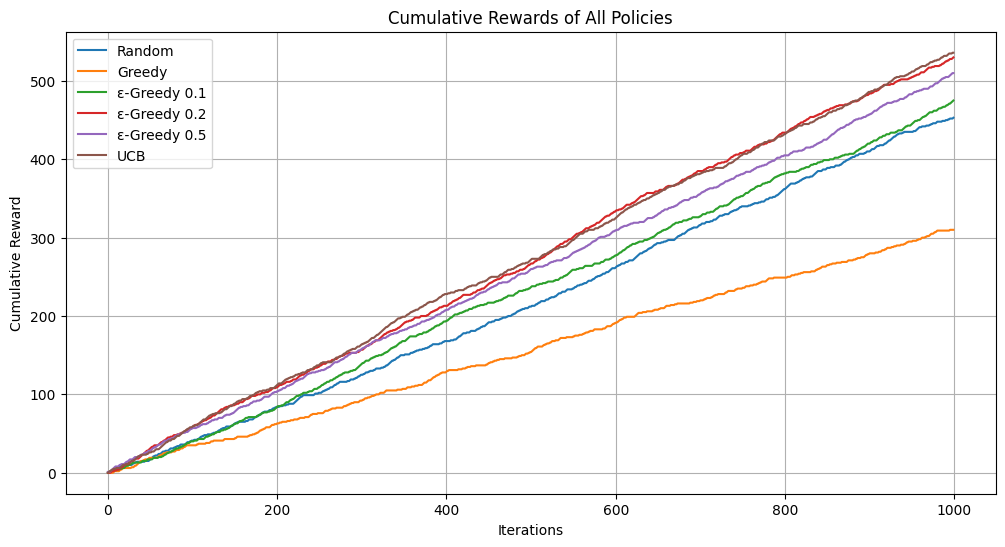

In [25]:
#-----write your code below this line---------

# Plot cumulative rewards across all policies
plt.figure(figsize=(12,6))
plt.plot(random_cumulative, label='Random')
plt.plot(greedy_cumulative, label='Greedy')
plt.plot(eg_cumulative_10, label='ε-Greedy 0.1')
plt.plot(eg_cumulative_20, label='ε-Greedy 0.2')
plt.plot(eg_cumulative_50, label='ε-Greedy 0.5')
plt.plot(ucb_cumulative, label='UCB')
plt.xlabel("Iterations")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Rewards of All Policies")
plt.legend()
plt.grid(True)
plt.show()

# Conclusion (0.5M)

write a conclusion (approximately 250 words) summarizing which treatment policy was most effective. Discuss the balance between exploration and exploitation in your simulations.

`----write below this line------`

The UCB policy was the most effective in maximizing cumulative rewards over 1000 iterations. It dynamically balances exploration and exploitation by adjusting confidence intervals, thus identifying high-performing arms while occasionally exploring others. ε-Greedy with ε=0.1 also performed well, suggesting that controlled exploration yields better long-term performance. Pure Greedy and Random strategies were less reliable as they either overexploited too early or lacked any strategic selection, respectively.
